## Exercise 10.1 (search)

We want to find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function. To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

### Solution

We first create the list of random numbers

In [1]:
import numpy as np
x = np.random.rand(1000)

#### Approach 1

In [2]:
import sys
def min_max1(x):
    x_min = sys.maxsize
    x_max = -sys.maxsize
    for num in x:
        if num < x_min:
            x_min = num
        if num > x_max:
            x_max = num
    return  x_min, x_max
    
print(min_max1(x))

(np.float64(0.0027096040010884392), np.float64(0.9995131978624862))


#### Approach 2

In [3]:
def min_max2(x):
    x_sorted = np.sort(x)
    x_min = x_sorted[0]
    x_max = x_sorted[-1]
    return x_min, x_max

print(min_max2(x))

(np.float64(0.0027096040010884392), np.float64(0.9995131978624862))


In [4]:
## test ##
assert min_max1(x) == min_max2(x)

In practice, we would use the the NumPy function:

In [5]:
print(np.min(x), np.max(x))

0.0027096040010884392 0.9995131978624862


## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

### Task

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here

    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:

$$
f(x) = \tan(x) - 2x
$$

between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ on the same graph, 
**and show all the roots** computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. 
What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, 
showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

### Solution

We first implement a Newton solver function:

In [6]:
import numpy as np

def newton(f, df, x_0, tol=1e-8, max_it=20):
    """Find root of equation defined by function f(x) where df(x) is
    first derivative and x is the initial guess.Optional arguments tol 
    (tolerance) and max_it (maximum number of iterations)"""
    it = 0
    while abs(f(x_0)) > tol and it < max_it:
        it += 1

        x_1 = -(f(x_0) / df(x_0)) + x_0
        x_0 = x_1
        print(x_0, f(x_0))
    return x_1


We now provide implementations of `f` and `df`, and find the roots:

In [7]:
def f(x):
    return np.tan(x) - 2*x

def df(x):
    return (np.cos(x))**-2 - 2

In [8]:
## tests ##

# Find roots near -1.2, 0.1, and 1.2
xroots = np.array((newton(f, df, -1.2),
                   newton(f, df, 0.1),
                   newton(f, df, 1.2)))
assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

-1.1693460244525156 -0.016999363031696912
-1.1656093110709203 -0.00021343115123606538
-1.165561193040886 -3.4735544662822804e-08
-1.1655611852072116 -1.3322676295501878e-15
-0.0006788667397830128 0.0006788666354954736
2.0857521276524543e-10 -2.0857521276524543e-10
1.1693460244525156 0.016999363031696912
1.1656093110709203 0.00021343115123606538
1.165561193040886 3.4735544662822804e-08
1.1655611852072116 1.3322676295501878e-15


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\danie\AppData\Local\Temp\ipykernel_99040\2415398691.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, df(x), label="$f^{\prime}(x)$")


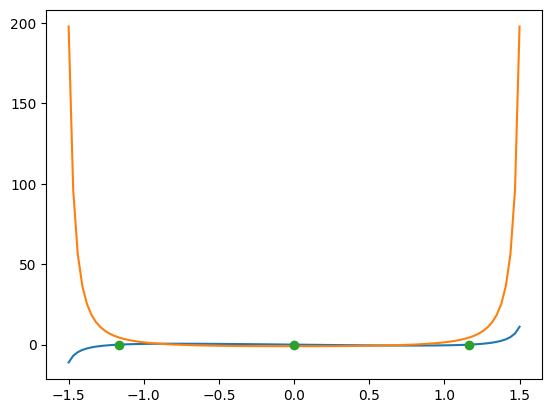

In [9]:
# We can visualise the result:
    
%matplotlib inline
import matplotlib.pyplot as plt

# Plot f and df/dx
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")

# Add location of roots to plot
plt.plot(xroots, [0] * len(xroots), 'o')

plt.show()

For the extension, we can replace the function `df(x)` with a new version

In [10]:
# def df(x):
#     # Try changing dx to 1e-15 or smaller
#     dx = 1e-9
#     ...

In [11]:
# ## tests ##

# # Find roots near -1.2, 0.1, and 1.2
# xroots = np.array((newton(f, df, -1.2),
#                    newton(f, df, 0.1),
#                    newton(f, df, 1.2)))
# assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

In [12]:
# # Plot f, f' and roots

# ...

In practice, we could use the Newton function `scipy.optimize.newton` from SciPy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) rather than implementing our own function.

## Exercise 10.3 (optional, low pass image filter)

Image files can be loaded as NumPy arrays displayed with Matplotlib. An imported colour image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity.
For a greyscale image, for each pixel we have either an integer (typically in the range [0, 255]) or a float (in the range [0, 1.0]).

Below we fetch an image and display it:

In [13]:
# %matplotlib inline
# import PIL
# import urllib
# import matplotlib.pyplot as plt

# # Import image
# url = 'https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/main/3.5.3/_images/stinkbug.png'
# img = np.array(PIL.Image.open(urllib.request.urlopen(url)))

# # Check type and shape
# print(type(img))
# print(f"Image array shape: {img.shape}")
# print(f"Image pixel type: {img.dtype}")

# # Convert pixel data from 8-bit integers [0, 255] to floats in range [0, 1]
# img = np.float64(img) / 255

# # Display image
# plt.imshow(img);

The task is to write a *function* that applies a particular low-pass filter algorithm to an image array 
and  returns the  filtered image. With this particular filter, the value of a pixel in the filtered image 
is equal to the average value of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, 
the neighbours are  `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```

In [14]:
# ...